In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [63]:
ori_df = pd.read_csv('credit_risk_dataset.csv')

In [64]:
ori_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [65]:
ori_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [66]:
ori_df.pivot_table(index = 'person_age', columns = 'loan_status', values= 'person_income', aggfunc='count').reset_index().sort_values(by = 'person_age', ascending = False)

loan_status,person_age,0,1
57,144,3.0,NaN
56,123,2.0,NaN
55,94,1.0,NaN
54,84,1.0,NaN
53,80,1.0,NaN
52,78,1.0,NaN
51,76,1.0,NaN
50,73,3.0,NaN
49,70,5.0,2.0
48,69,5.0,NaN


Need to remove the outliers as this age 123 and 144 is unrealistic -- 

In [67]:
df1 = ori_df.copy()

In [68]:
df1 = df1[df1['person_age']< 100]

In [69]:
print(ori_df.shape)
print(df1.shape)

(32581, 12)
(32576, 12)


In [70]:
df1.pivot_table(index='person_emp_length',
                columns='loan_status',
                values='person_income',
                aggfunc='count').reset_index().sort_values(by ='person_emp_length',ascending=False)

loan_status,person_emp_length,0,1
35,123.0,1.0,1.0
34,41.0,1.0,NaN
33,38.0,1.0,NaN
32,34.0,NaN,1.0
31,31.0,4.0,NaN
30,30.0,1.0,1.0
29,29.0,NaN,1.0
28,28.0,3.0,NaN
27,27.0,4.0,1.0
26,26.0,5.0,1.0


In [71]:
df1.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [72]:
emp_median = df1['person_emp_length'].median()
df1['person_emp_length'] = df1['person_emp_length'].fillna(emp_median)

In [73]:
df1 = df1[df1['person_emp_length'] < 47]

In [74]:
df2= df1.copy()
print(df2.shape)

(32574, 12)


In [75]:
df2.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Instead of filling emply loan int rate with the median or mean-- i am looking for a meadian value as per grape and then filling accordingly --


In [76]:
df2['loan_int_rate'] = df2['loan_int_rate'].fillna(
    df2.groupby('loan_grade')['loan_int_rate'].transform('median')
)

print(df2.groupby('loan_grade')['loan_int_rate'].median())

loan_grade
A     7.490
B    10.990
C    13.480
D    15.310
E    16.820
F    18.535
G    20.160
Name: loan_int_rate, dtype: float64


In [77]:
df2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [78]:
df3 = df2.copy()

In [79]:
df3.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.760576,9588.018051,11.013752,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,3.981181,6320.249598,3.212328,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.480000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [80]:
df3['loan_status'].value_counts(normalize = True) *100



loan_status
0    78.181986
1    21.818014
Name: proportion, dtype: float64

Data set is quite imbalnce -- 

In [81]:
df3['loan_grade'].value_counts()

loan_grade
A    10776
B    10448
C     6456
D     3625
E      964
F      241
G       64
Name: count, dtype: int64

In [82]:
df3['person_home_ownership'].value_counts()

person_home_ownership
RENT        16442
MORTGAGE    13441
OWN          2584
OTHER         107
Name: count, dtype: int64

In [83]:
df3.to_csv('credit_risk_cleaned_eda.csv', index = False)

Data preprocessing :- 


In [84]:
df3.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [85]:
#this columns is showcasing past defaults -- 
df3['cb_person_default_on_file'] = df3['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

Combining grades

loan_grade
A     9.957313
B    16.280628
C    20.740397
D    59.034483
E    64.419087
F    70.539419
G    98.437500
Name: loan_status, dtype: float64


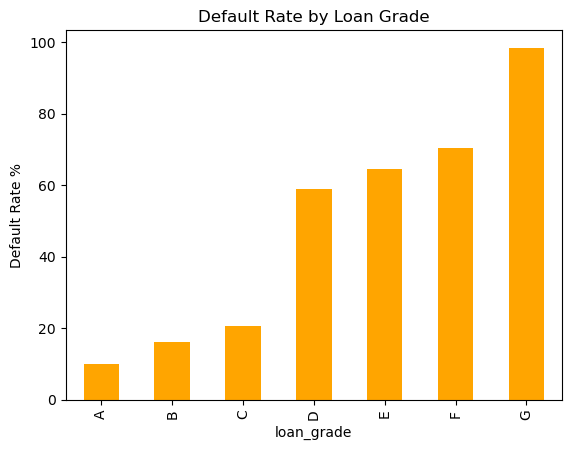

In [86]:
risk_per_grade = df3.groupby('loan_grade')['loan_status'].mean() * 100
print(risk_per_grade)

risk_per_grade.plot(kind= 'bar', color='orange')
plt.ylabel('Default Rate %')
plt.title('Default Rate by Loan Grade')
plt.show()

In [87]:
def combine_loan_grades(grade):
    if grade=='A':
        return 1        #lowest risk
    if grade==['B', 'C']:
        return 2        #low- med risk
    if grade == ['D', 'E', 'F']:
        return 3         #med -high risk 
    elif grade == 'G':
        return 4      #high risk 
    else:
        return 0 # missing-- 
    

df3['loan_grade_combined'] = df3['loan_grade'].apply(combine_loan_grades)
df4 = df3.drop('loan_grade', axis =1)

In [88]:
df4.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_combined
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,0,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,0,3,0
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,0,2,0
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,1,4,0
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,0,2,1


In [89]:
#one-hot encoding on person home ownership 

df4 = pd.get_dummies(df4, columns= ['person_home_ownership'], drop_first=True, dtype=int)

In [90]:
df4.head()

,person_age,person_income,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_combined,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
1,21,9600,5.0,EDUCATION,1000,11.14,0,0.10,0,2,0,0,1,0
2,25,9600,1.0,MEDICAL,5500,12.87,1,0.57,0,3,0,0,0,0
3,23,65500,4.0,MEDICAL,35000,15.23,1,0.53,0,2,0,0,0,1
4,24,54400,8.0,MEDICAL,35000,14.27,1,0.55,1,4,0,0,0,1
5,21,9900,2.0,VENTURE,2500,7.14,1,0.25,0,2,1,0,1,0


In [91]:
df5 = df4.copy()

In [92]:
df5 = pd.get_dummies(df5, columns = ['loan_intent'], drop_first=True, dtype=int)

In [93]:
df5.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_combined,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,0,1,0,1,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,1,0,0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,1,0,0
5,21,9900,2.0,2500,7.14,1,0.25,0,2,1,0,1,0,0,0,0,0,1


In [94]:
df5.shape

(32574, 18)

Train- Test split --

In [95]:
from sklearn.model_selection import train_test_split

X = df5.drop('loan_status', axis=1) #features
y = df5['loan_status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)             #label/ targetvariable


In [96]:
print(X_train.shape)
print(X_test.shape)

(26059, 17)
(6515, 17)


In [97]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = xgb.XGBClassifier(
    n_estimators = 100,
    learning_rate= 0.1,
    max_depth=5,
    random_state=42,
    eval_metric= 'logloss'
)


print("training model.......")
model.fit(X_train, y_train)

print("predictions...")
y_pred = model.predict(X_test)


#evaluation--

accuracy = accuracy_score(y_test, y_pred)
print(f"\n accuracy: {accuracy:.2%}")

print("\n Classification report")
print(classification_report(y_test, y_pred))


print(f"\nConfusion MATRIX")
print(confusion_matrix (y_test,y_pred))


training model.......
predictions...

 accuracy: 92.14%

 Classification report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5094
           1       0.94      0.68      0.79      1421

    accuracy                           0.92      6515
   macro avg       0.93      0.83      0.87      6515
weighted avg       0.92      0.92      0.92      6515


Confusion MATRIX
[[5036   58]
 [ 454  967]]


In [102]:
# Calculate the Scale Weight
# Formula----->>> (Count of 0s) / (Count of 1s)
count_0 = (y_train == 0).sum()
count_1 = (y_train == 1).sum()
weight = count_0 / count_1

print(f"Calculated scale_pos_weight: {weight:.2f}")

#ReInitialize Model with the Weight
model_balanced = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42, 
    eval_metric='logloss',
    scale_pos_weight=weight  # <--- This is the magic parameter
)


print("Training balanced model...")
model_balanced.fit(X_train, y_train)

#Eval---
y_pred_balanced = model_balanced.predict(X_test)

print("\n new Classification Report:")
print(classification_report(y_test, y_pred_balanced))

Calculated scale_pos_weight: 3.58
Training balanced model...

 new Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5094
           1       0.74      0.77      0.76      1421

    accuracy                           0.89      6515
   macro avg       0.84      0.85      0.84      6515
weighted avg       0.89      0.89      0.89      6515



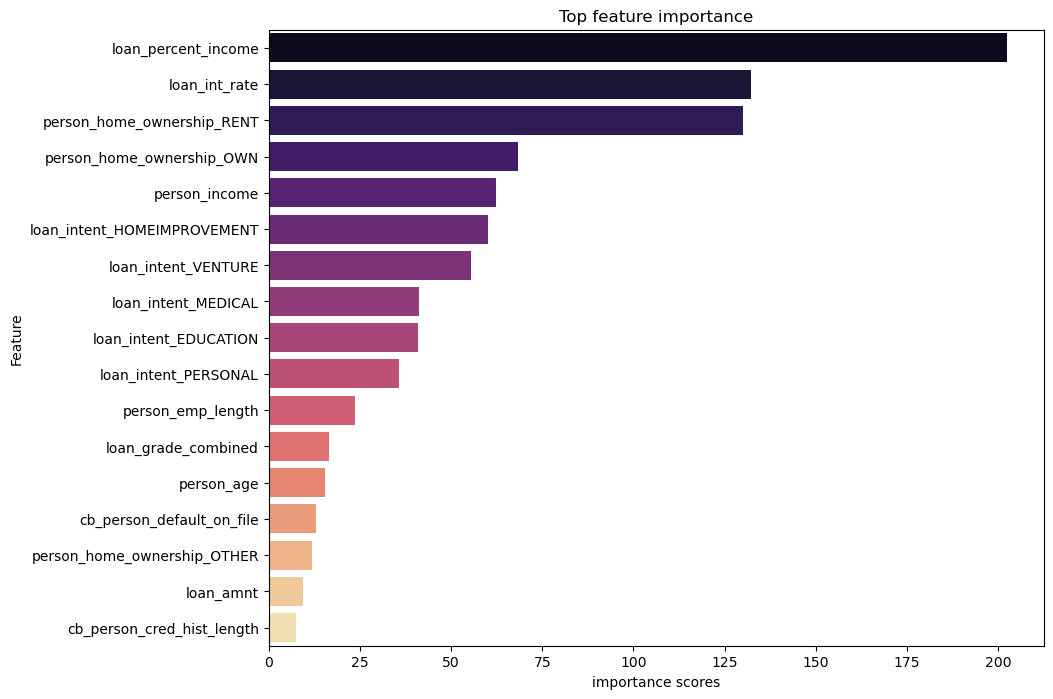

In [99]:
#feature importance--graph 

importance_score = model_balanced.get_booster().get_score(importance_type= 'gain')

importance_df = pd.DataFrame(
    list(importance_score.items()),
    columns= ['Feature', 'Importance']
).sort_values(by= 'Importance', ascending= False)

plt.figure(figsize=(10, 8))

sns.barplot(
    x = 'Importance',
    y = 'Feature',
    data = importance_df,
    hue='Feature',       
    palette='magma',
    legend=False  
)

plt.title( 'Top feature importance')
plt.xlabel('importance scores')
plt.ylabel('Feature')
plt.show()

#age is showing not much importance -- bcz this crdit have more relibilty or more dependent on incomes levelss-  

In [100]:
from sklearn.model_selection import RandomizedSearchCV

paramgrid = {
    'n_estimators' : [100, 200, 300], #treess
    'learning_rate' : [0.01, 0.05,  0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample' : [0.7, 0.8, 0.9, 1],
    'colsample_bytree' : [0.7, 0.8, 0.9, 1]

}


xgb_model = xgb.XGBClassifier(
    random_state = 42,
    eval_metric = 'logloss',
    scale_pos_weight =weight
)

random_search = RandomizedSearchCV(
    estimator= xgb_model,
    param_distributions= paramgrid,
    n_iter= 20,
    scoring = 'recall',
    cv = 3,             # 3-fold cross-validation
    verbose =1,
    random_state= 42,
    n_jobs= -1        #use comp. core 
)


print("random search resultss---")
random_search.fit(X_train, y_train)

#results
print(f"\n best recall score: {random_search.best_score_:.2%}")
print("\n best parameters")

print(random_search.best_params_)
best_model = random_search.best_estimator_


random search resultss---
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 best recall score: 80.69%

 best parameters
{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.7}


traing on the final - best parametre model

 final model performance :
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5094
           1       0.72      0.80      0.76      1421

    accuracy                           0.89      6515
   macro avg       0.83      0.86      0.84      6515
weighted avg       0.89      0.89      0.89      6515



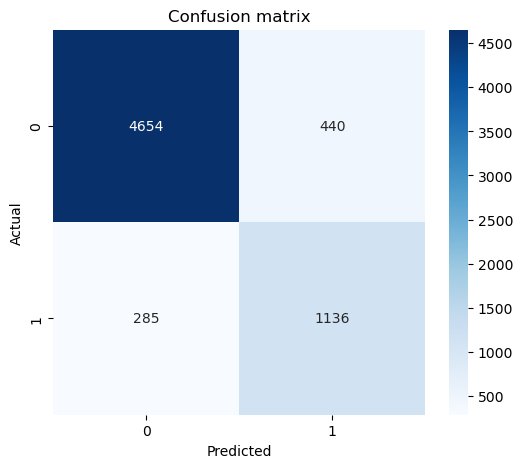

In [101]:
#using bestparameter for final model \

final_model = xgb.XGBClassifier(
    n_estimators = 200,
    learning_rate = 0.2,
    max_depth =3,
    subsample= 0.7,
    colsample_bytree = 0.7,
    scale_pos_weight = weight,
    random_state = 42,
    eval_metric = 'logloss'
)


print("traing on the final - best parametre model")
final_model.fit(X_train, y_train)

#eval--
y_pred_final  = final_model.predict(X_test)

print("\n final model performance :")
print(classification_report (y_test, y_pred_final))

#plotting confusion matrix 
plt.figure(figsize= (6,5))
sns.heatmap(confusion_matrix(y_test,y_pred_final),  annot=True, fmt = 'd', cmap ='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--------------------model completed----------------------------------

In [103]:
import joblib

filename = 'credit_risk_model_final.pkl'

joblib.dump(final_model, filename)
print(f"model saved '{filename}' ")

model saved 'credit_risk_model_final.pkl' 


In [132]:
#testing-- 
predictions = final_model.predict(X_test)


print("Predicted:", predictions[:30])
print("Actual:   ",  y_test.values[:30])

Predicted: [0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
Actual:    [1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]


Now--
Workflow----
:-- CSV $\rightarrow$ Cleans it $\rightarrow$ Predicts Risk $\rightarrow$ Connects to SQL and uploads everything.

